In [1]:
#Importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
#Uploading the dataset
FARS = pd.read_csv("/content/drive/MyDrive/Hackathon/fars_train.csv")
FARS.head(4)

,u_id,fatals,a_ct,a_ped_f,a_pedal_f,a_roll,a_hr,a_polpur,month,day,...,owner,deaths,numoccs,impact1,deformed,ve_forms,ve_total,weather,lgt_cond,driver_factor
0,32083,1,Single-Vehicle Crash,Other Crash,Other Crash,Other Crash,No - Hit and Run,Other Crash,10,2,...,Driver (in this crash) Was Registered Owner,1,1.0,Clockpoint 12,Disabling damage,1,1,Clear,Dark - not lighted,other
1,55073,1,Single-Vehicle Crash,Other Crash,Other Crash,Other Crash,No - Hit and Run,Other Crash,6,21,...,Driver (in this crash) Not Registered Owner (o...,1,1.0,Clockpoint 1,Disabling damage,1,1,Clear,Daylight,speeding_driver_involved
2,7458,1,Single-Vehicle Crash,Other Crash,Other Crash,Other Crash,No - Hit and Run,Other Crash,7,14,...,Driver (in this crash) Was Registered Owner,0,1.0,Clockpoint 12,NaN,1,1,Clear,Daylight,other
3,5685,1,Single-Vehicle Crash,Other Crash,Other Crash,Other Crash,No - Hit and Run,Other Crash,9,15,...,Driver (in this crash) Not Registered Owner (o...,0,1.0,Clockpoint 12,Functional damage,1,1,Clear,Dark - not lighted,other


# **Pre-Processing**


## **Understanding the FARS dataset**

In [3]:
#Dimensions of the dataset
print("The dimensions of the FARS dataset are", FARS.shape,
      "meaning we have", FARS.shape[0], "rows and",
      FARS.shape[1], "columns in the FARS Dataset")

The dimensions of the FARS dataset are (45286, 39) meaning we have 45286 rows and 39 columns in the FARS Dataset


In [4]:
#Data types of columns in the dataset
FARS.dtypes

u_id               int64
fatals             int64
a_ct              object
a_ped_f           object
a_pedal_f         object
a_roll            object
a_hr              object
a_polpur          object
month              int64
day                int64
day_week          object
hour             float64
minute           float64
a_dow_type        object
a_tod_type        object
state             object
a_region          object
a_ru              object
a_inter           object
a_intsec          object
a_roadfc          object
a_junc            object
a_relrd           object
age                int64
permvit            int64
pernotmvit         int64
a_ped             object
mod_year         float64
a_body            object
owner             object
deaths             int64
numoccs          float64
impact1           object
deformed          object
ve_forms           int64
ve_total           int64
weather           object
lgt_cond          object
driver_factor     object
dtype: object

The data type displays a dataset with several columns containing information related to vehicular accidents. These columns encompass diverse details such as unique identifiers, fatality counts, vehicle attributes, accident timing, location specifics, age, and other relevant factors. The dataset captures crucial aspects such as accident severity, vehicle types, weather conditions, and lighting, thereby offering a comprehensive overview of the contributing elements in accidents.

In [5]:
#Getting more information about FARS dataset
#FARS.info() provides a summary of the dataset's suck as the rangeIndex, data columns, Dtype, and the count of non-null
FARS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45286 entries, 0 to 45285
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   u_id           45286 non-null  int64  
 1   fatals         45286 non-null  int64  
 2   a_ct           45286 non-null  object 
 3   a_ped_f        45286 non-null  object 
 4   a_pedal_f      45286 non-null  object 
 5   a_roll         45286 non-null  object 
 6   a_hr           45286 non-null  object 
 7   a_polpur       45286 non-null  object 
 8   month          45286 non-null  int64  
 9   day            45286 non-null  int64  
 10  day_week       45286 non-null  object 
 11  hour           44796 non-null  float64
 12  minute         44795 non-null  float64
 13  a_dow_type     45286 non-null  object 
 14  a_tod_type     44796 non-null  object 
 15  state          45286 non-null  object 
 16  a_region       45286 non-null  object 
 17  a_ru           45086 non-null  object 
 18  a_inte

The FARS dataset consists of 4 float64, 10 int64, and 25 object columns. This variety of data types reflects the dataset's comprehensive nature, covering both numerical and categorical information. With 45286 entries and 39 columns, it provides rich insights into various aspects of vehicular accidents, encompassing fatality details, timing, location, and vehicle characteristics. Missing values in certain columns suggest areas for data preprocessing.

In [6]:
#FARS.describe() provides statistics such as the mean, minimum, standard deviation, and more.
FARS.describe()

,u_id,fatals,month,day,hour,minute,age,permvit,pernotmvit,mod_year,deaths,numoccs,ve_forms,ve_total
count,45286.000000,45286.000000,45286.000000,45286.000000,44796.000000,44795.000000,45286.000000,45286.000000,45286.000000,45009.000000,45286.000000,44855.000000,45286.0,45286.000000
mean,28338.636863,1.048161,6.708939,15.683125,12.603045,28.335104,41.507265,1.469063,0.338537,2005.464085,0.740913,1.478141,1.0,1.050987
std,16370.250933,0.268141,3.379152,8.845668,7.378776,17.498636,18.031039,1.112965,0.567394,7.298116,0.549848,1.176799,0.0,0.338383
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000,1.000000,0.000000,1923.000000,0.000000,1.000000,1.0,1.000000
25%,14148.500000,1.000000,4.000000,8.000000,6.000000,14.000000,26.000000,1.000000,0.000000,2001.000000,0.000000,1.000000,1.0,1.000000
50%,28380.500000,1.000000,7.000000,16.000000,14.000000,29.000000,38.000000,1.000000,0.000000,2005.000000,1.000000,1.000000,1.0,1.000000
75%,42532.500000,1.000000,10.000000,23.000000,19.000000,44.000000,55.000000,2.000000,1.000000,2011.000000,1.000000,2.000000,1.0,1.000000
max,56607.000000,20.000000,12.000000,31.000000,23.000000,59.000000,97.000000,52.000000,23.000000,2019.000000,18.000000,52.000000,1.0,21.000000


In [19]:
#Checking for missing data in the FARS dataset
FARS.isnull().sum()

u_id             0
fatals           0
a_ct             0
a_ped_f          0
a_pedal_f        0
a_roll           0
a_hr             0
a_polpur         0
month            0
day              0
day_week         0
hour             0
minute           0
a_dow_type       0
a_tod_type       0
state            0
a_region         0
a_ru             0
a_inter          0
a_intsec         0
a_roadfc         0
a_junc           0
a_relrd          0
age              0
permvit          0
pernotmvit       0
a_ped            0
mod_year         0
a_body           0
owner            0
deaths           0
numoccs          0
impact1          0
deformed         0
ve_forms         0
ve_total         0
weather          0
lgt_cond         0
driver_factor    0
dtype: int64

## **Cleaning FARS dataset**


### **Handling Missing Values**

In [8]:
#Fill missing values in numerical columns with mean
#hour, minute, mod_year, and numoccs
numericalColumns = ['hour', 'minute', 'mod_year', 'numoccs']

for col in numericalColumns:
    if FARS[col].dtype == np.float64 or FARS[col].dtype == np.int64:
        FARS[col].fillna(FARS[col].mean(), inplace=True)


#Fill missing values in numerical columns with mode
#a_tod_type,a_ru, a_inter, a_intsec, owner, impact1, deformed, weather, and lgt_cond
categoricalColumns = ['a_tod_type', 'a_ru', 'a_inter', 'a_intsec', 'owner', 'impact1', 'deformed', 'weather', 'lgt_cond','a_junc']

for col in categoricalColumns:
    if FARS[col].dtype == 'object':
        FARS[col].fillna(FARS[col].mode()[0], inplace=True)


### **Dealing with Duplicates**

In [9]:
#Reviewing duplicated_rows in the FARS dataset
duplicated_rows = FARS[FARS.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [u_id, fatals, a_ct, a_ped_f, a_pedal_f, a_roll, a_hr, a_polpur, month, day, day_week, hour, minute, a_dow_type, a_tod_type, state, a_region, a_ru, a_inter, a_intsec, a_roadfc, a_junc, a_relrd, age, permvit, pernotmvit, a_ped, mod_year, a_body, owner, deaths, numoccs, impact1, deformed, ve_forms, ve_total, weather, lgt_cond, driver_factor]
Index: []

[0 rows x 39 columns]


In [10]:
#The sum count of the duplicated values
FARS.duplicated().sum()

0

The FARS dataset does not have any duplicate values.

### **Handling Outliers**

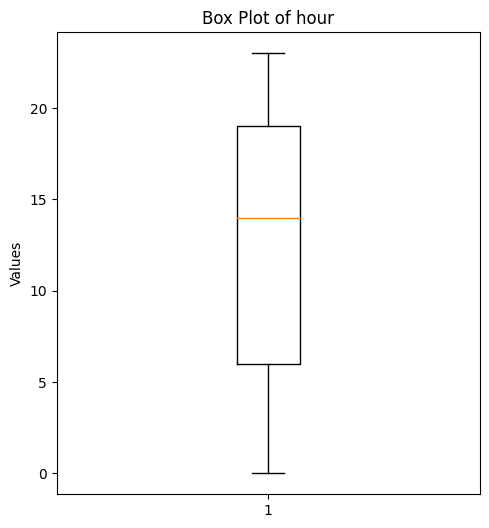

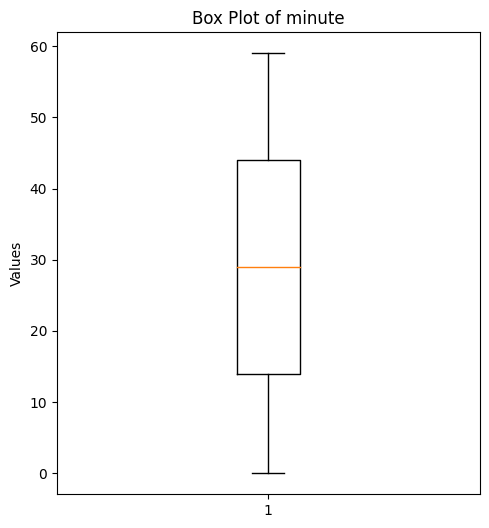

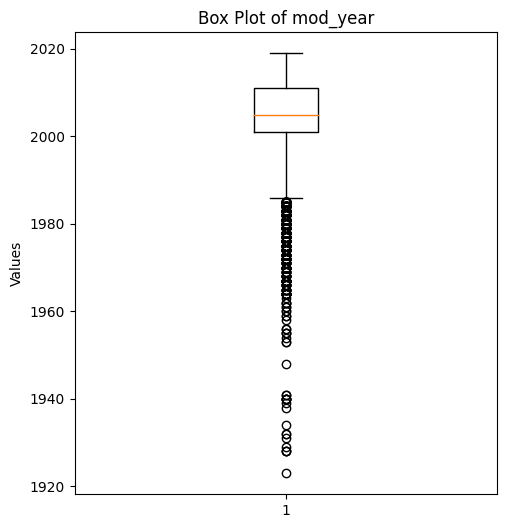

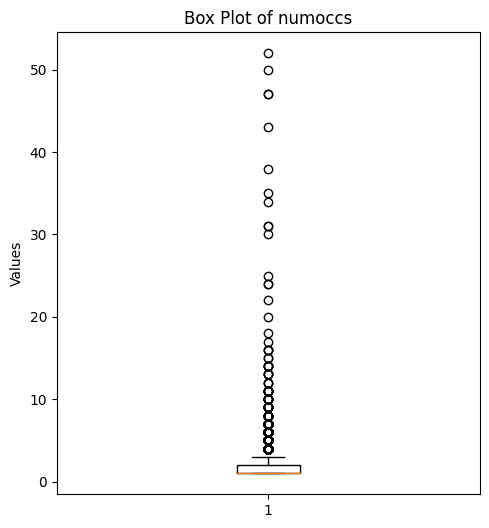

In [11]:

numericalColumns = ['hour', 'minute', 'mod_year', 'numoccs']
categoricalColumns = ['a_tod_type', 'a_ru', 'a_inter', 'a_intsec', 'owner', 'impact1', 'deformed', 'weather', 'lgt_cond','a_junc']
# Create box plots and histograms for numerical columns
for col in numericalColumns:
    plt.figure(figsize=(12, 6))

    # Box plot
    plt.subplot(1,2,1)
    plt.boxplot(FARS[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('Values')
    plt.show()


year and numoccs

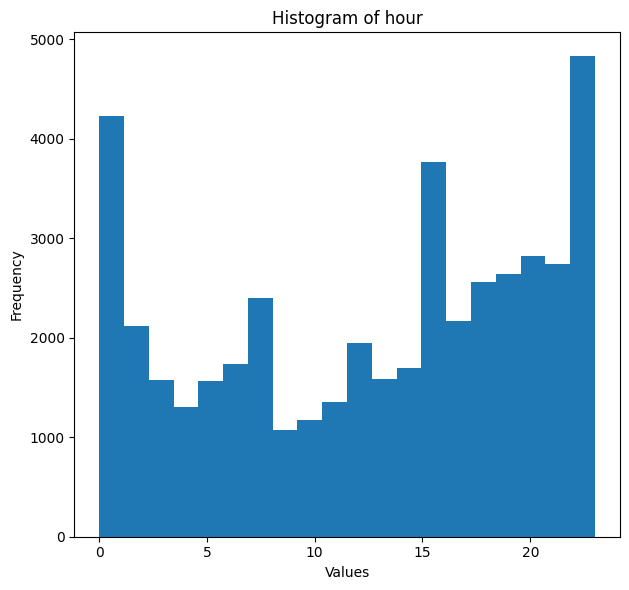

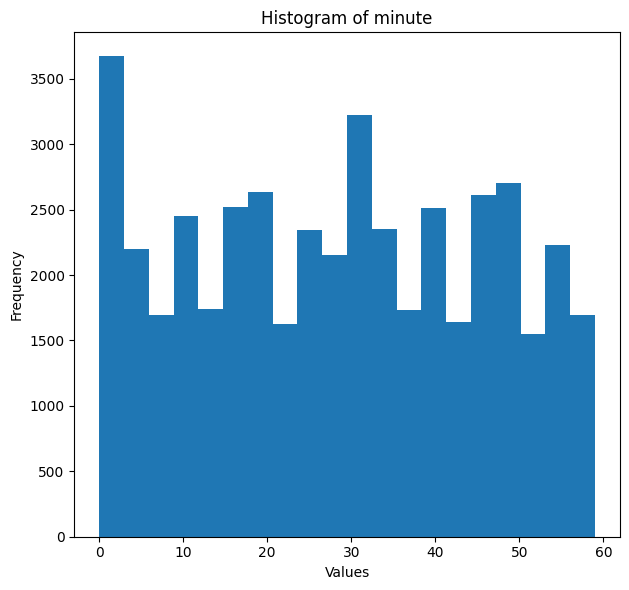

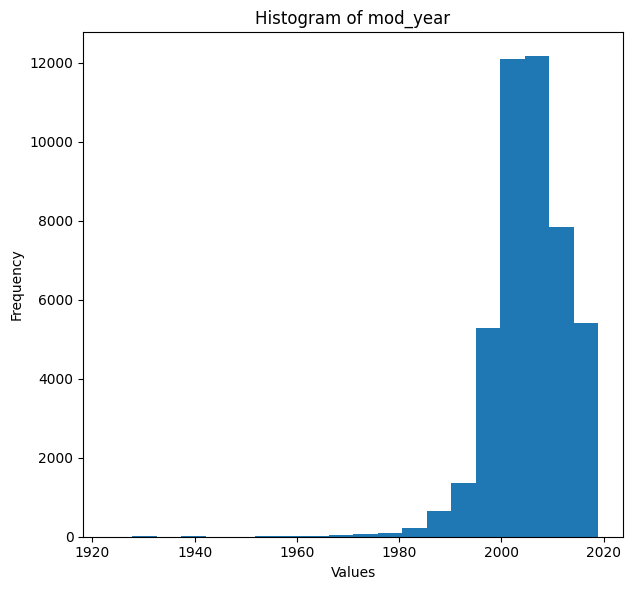

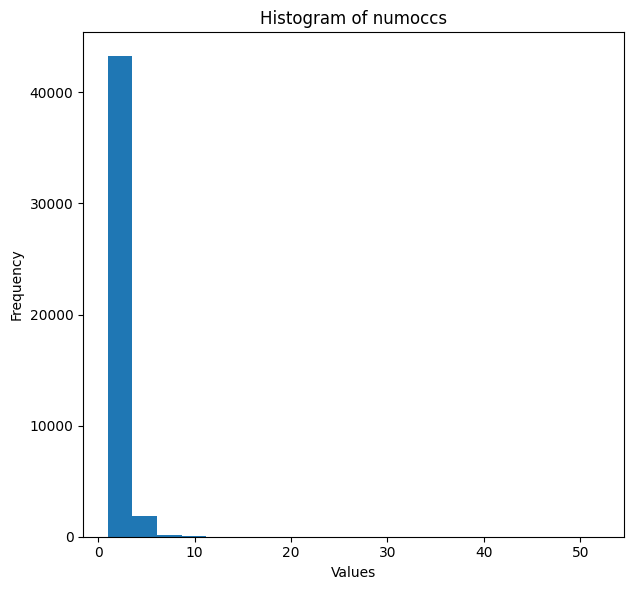

In [12]:
for col in numericalColumns:
    plt.figure(figsize=(12, 6))
    # Histogram
    plt.subplot(1, 2, 2)
    plt.hist(FARS[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

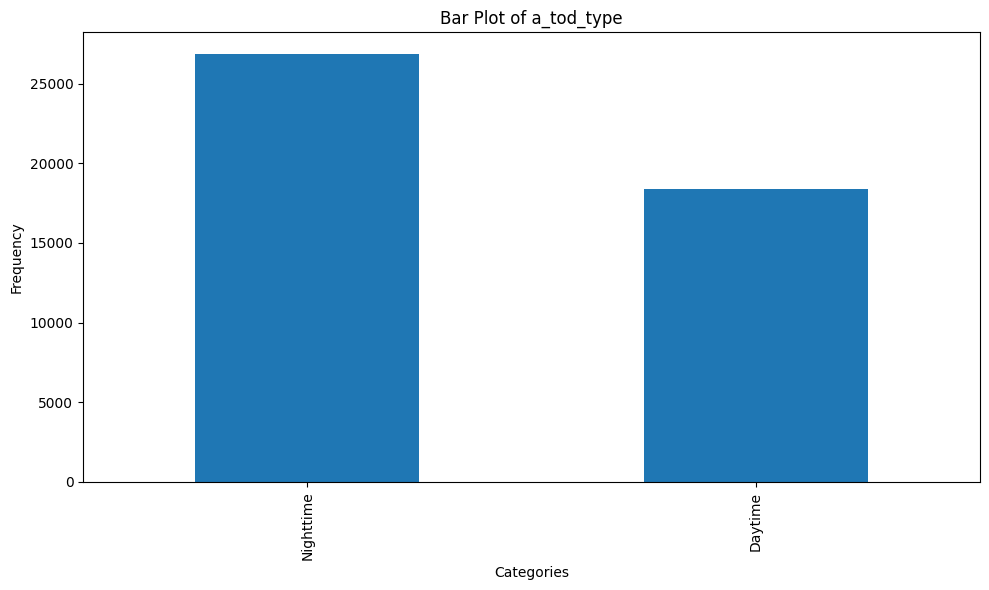

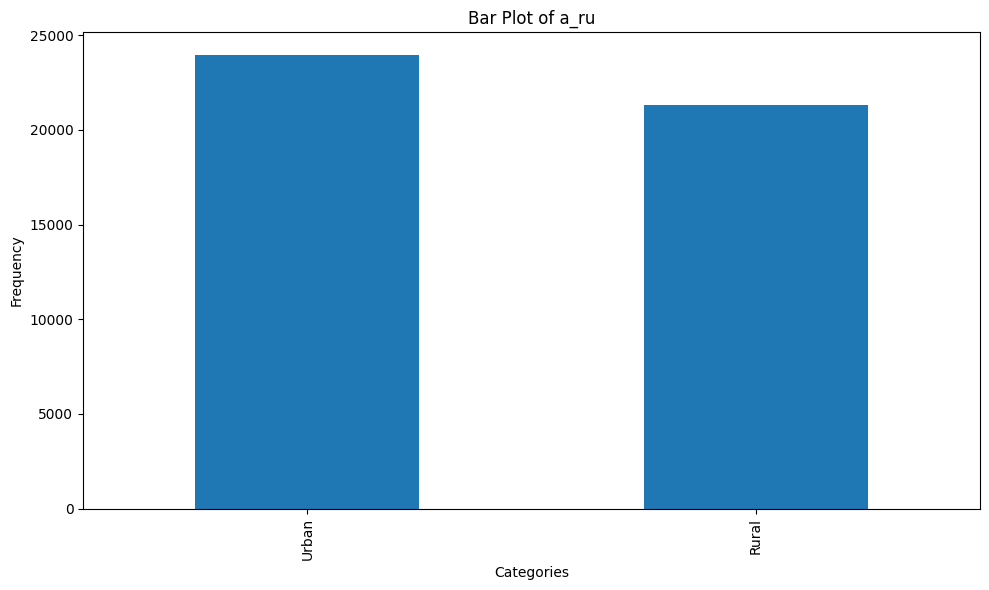

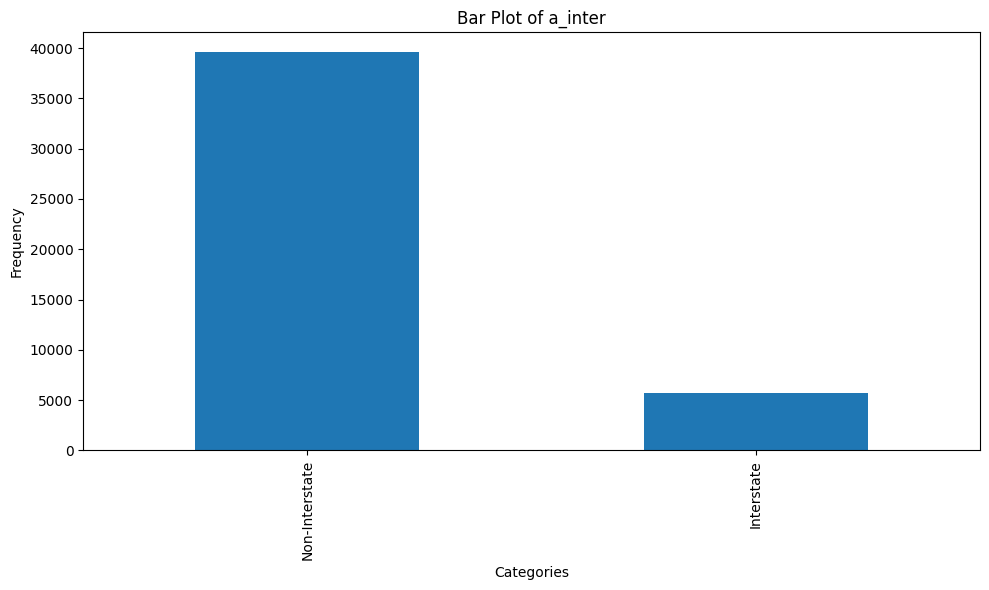

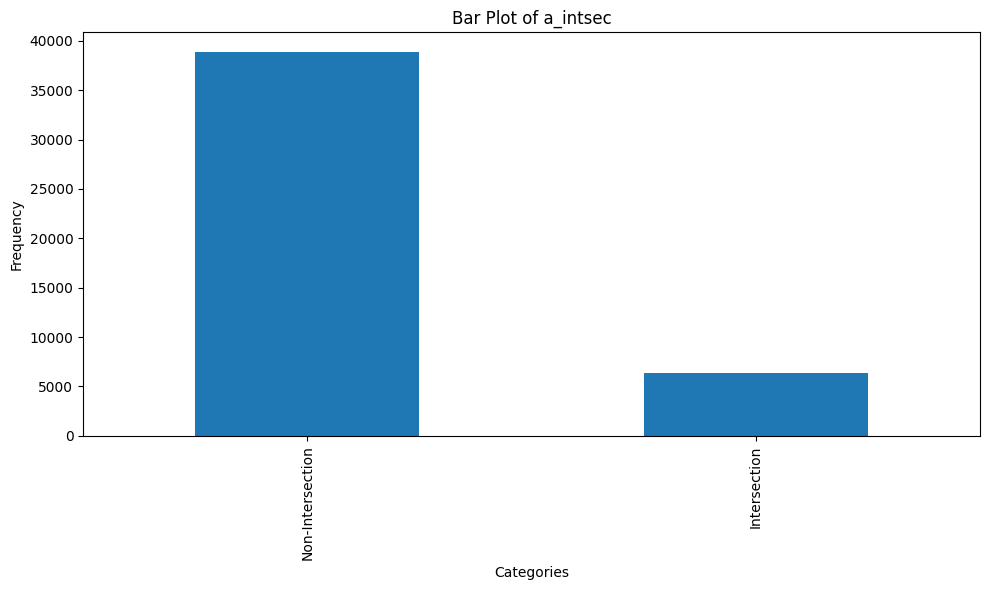

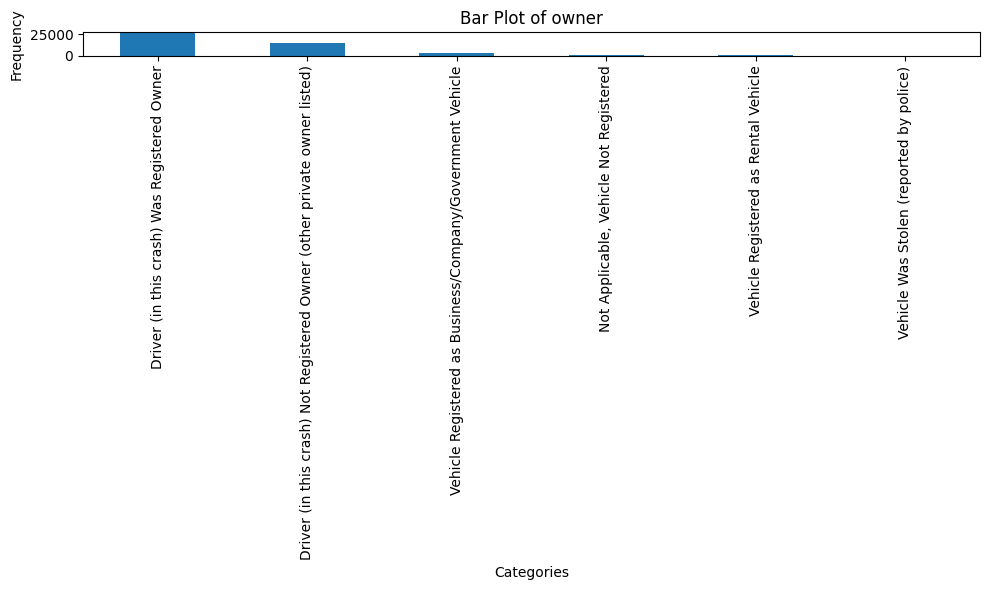

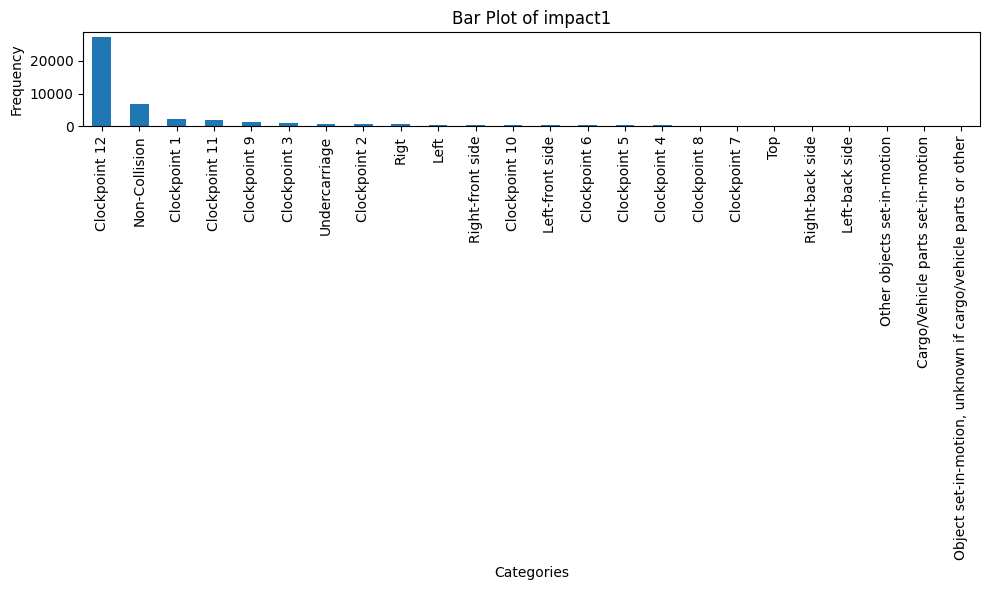

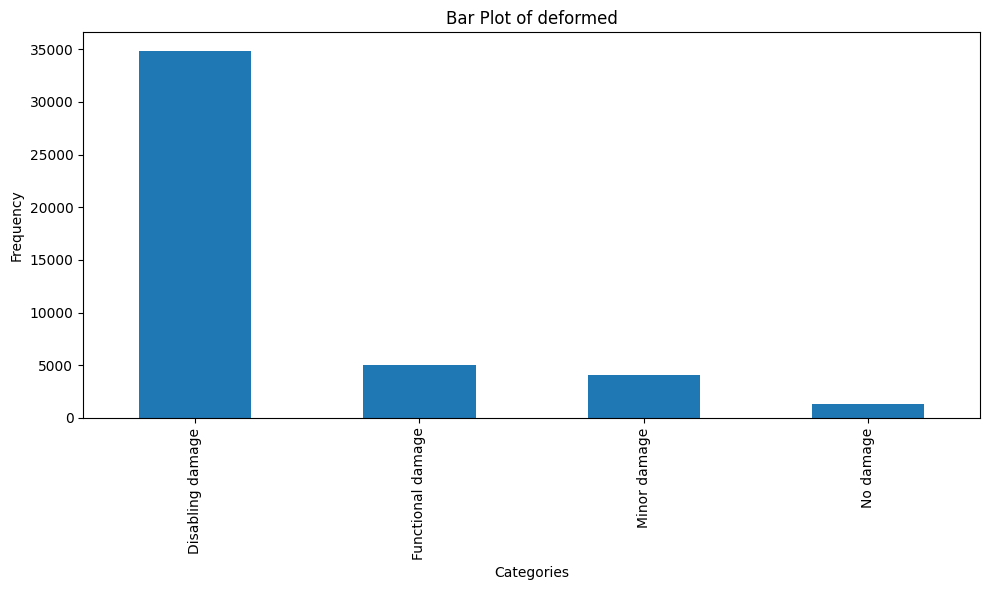

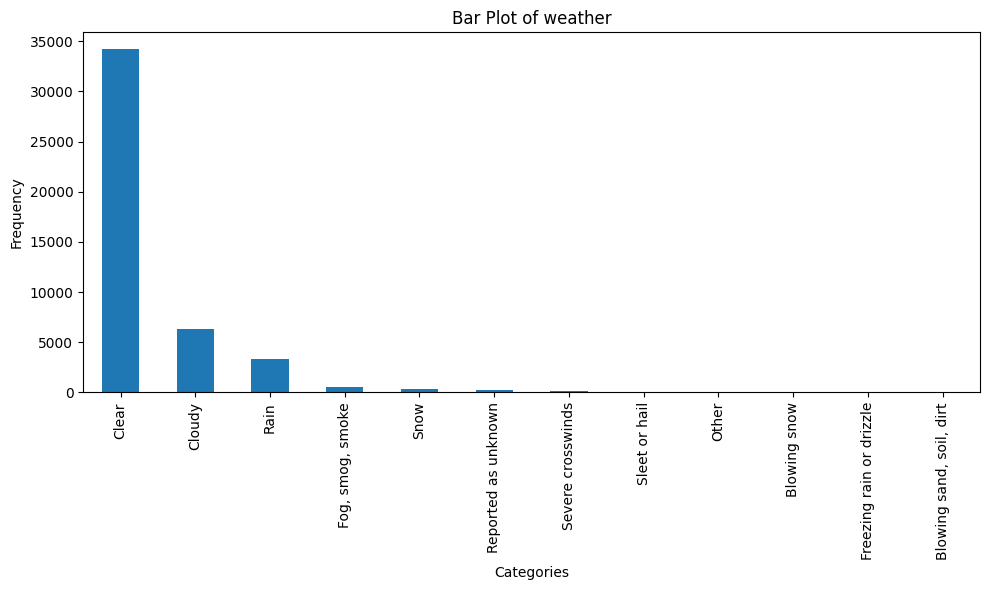

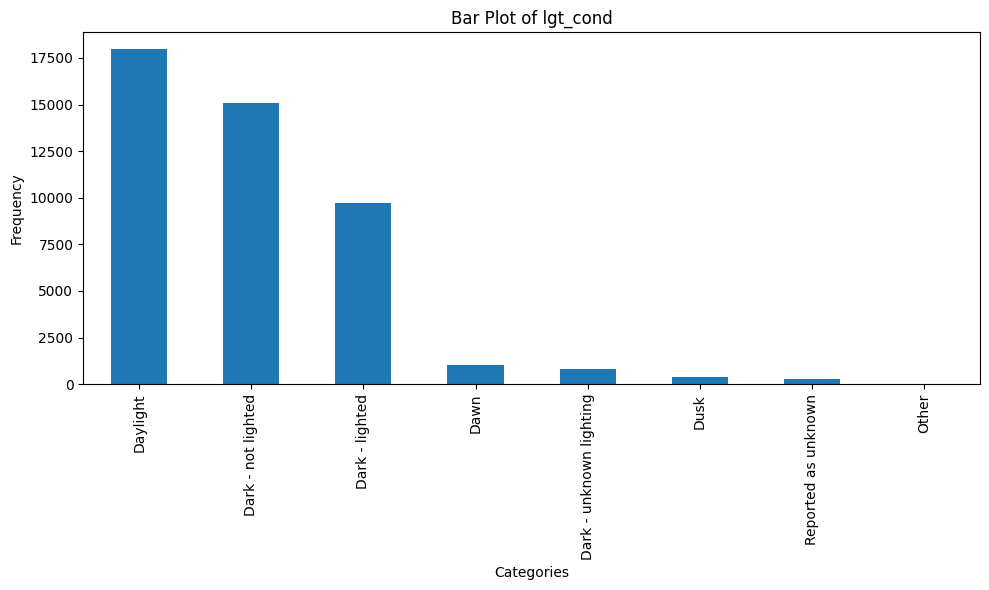

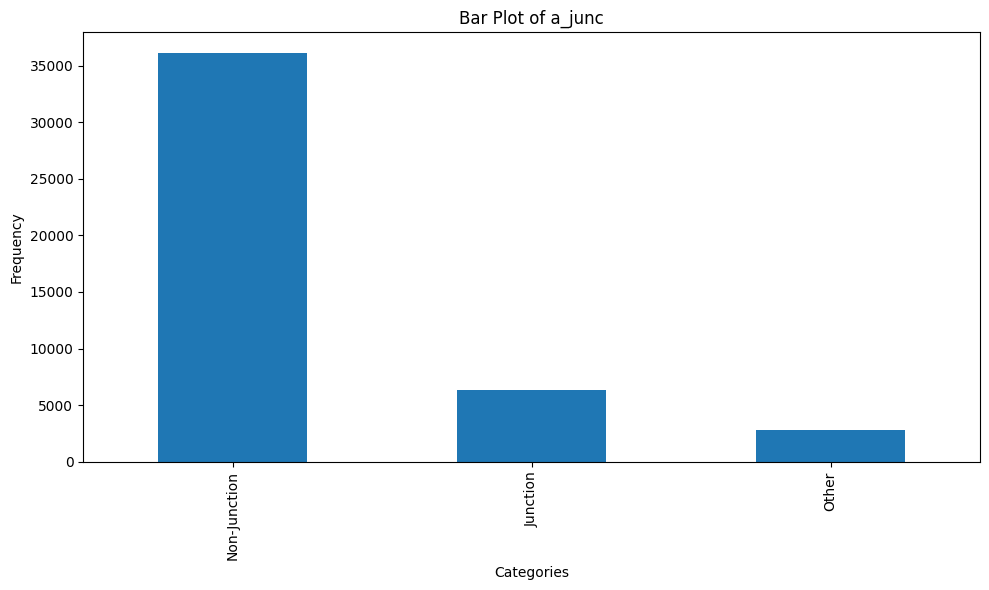

In [13]:
#Create bar plots for categorical columns
for col in categoricalColumns:
    plt.figure(figsize=(10, 6))

    # Bar plot
    value_counts = FARS[col].value_counts()
    value_counts.plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
